In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [154]:
female_data=pd.read_csv("ANSUR II FEMALE Public.csv")
female_data.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [155]:
male_data=pd.read_csv("ANSUR II MALE Public.csv",encoding="latin-1")
male_data.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [156]:
data=pd.concat([female_data,male_data])
data

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,NaN,235,1353,312,216,1263,228,193,384,318,...,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand,29442.0
4078,NaN,247,1473,336,234,1346,253,196,428,374,...,91B,Oklahoma,1,NaN,1,22,71,194,Right hand,29443.0
4079,NaN,264,1394,313,227,1280,245,193,407,367,...,13B,Oklahoma,1,NaN,1,23,67,186,Right hand,29447.0
4080,NaN,203,1417,327,223,1314,250,196,419,365,...,13P,Oklahoma,1,NaN,1,22,69,165,Right hand,29451.0


2- Preprocess dateset for converting unit of weight, unit of height and datatype of gender.

In [157]:
data["weightkg"]=data["weightkg"]/10 #convert to kg
data["stature"]=data["stature"]/10 #convert to cm
data["Gender"]=data["Gender"].replace(["Female","Male"],[0,1]) #convert to binary

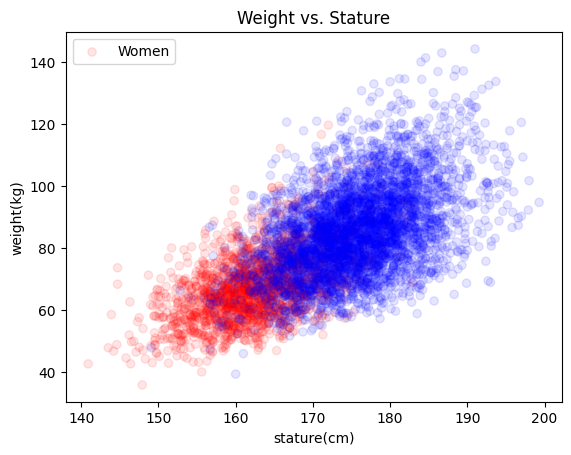

In [158]:
cmap=["red","blue"]
# alpha=[0.8, 0.1]
plt.scatter(data["stature"],data["weightkg"],c=data["Gender"], cmap=ListedColormap(cmap),alpha=0.1)
plt.title("Weight vs. Stature")
plt.xlabel("stature(cm)")
plt.ylabel("weight(kg)")
plt.legend(["Women", "Men"])
plt.show()

3- Show heights for women and men on same plot.

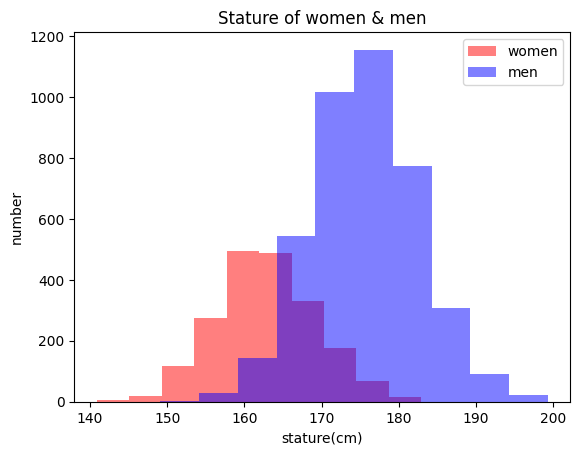

In [159]:
plt.hist(female_data["stature"]/10,alpha=0.5,color="red",label="women")
plt.hist(male_data["stature"]/10,alpha=0.5,color="blue",label="men")
plt.title("Stature of women & men")
plt.xlabel("stature(cm)")
plt.ylabel("number")
plt.legend()
plt.show()

- A. Why is the data of men higher than the data of women? Because in reality, most men are taller than women

‌- B. Why is the data of men more right than the data of women?🤔

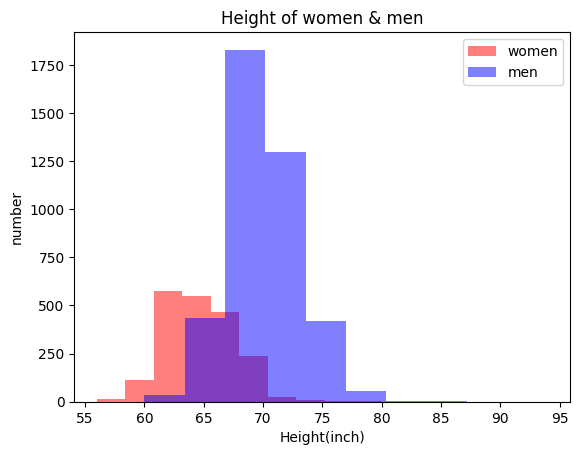

In [184]:
plt.hist(female_data["Heightin"],alpha=0.5,color="red",label="women")
plt.hist(male_data["Heightin"],alpha=0.5,color="blue",label="men")
plt.title("Height of women & men")
plt.xlabel("Height(inch)")
plt.ylabel("number")
plt.legend()
plt.show()

در صورتیکه نمودار () را برای مرد و زن رسم کنیم، در پاسخ به قسمت 2سوال 3 میتوان گفت: علت مخفی کار تر بودن زنان در دادن اطلاعات است. البته از طرفی این حرف برای وزن و تمایل زنان به کمتر نشان دادن ویژگی هایی مثل وزن و سن صحیح تر است

4- Split dataset to train and test datasets (%80 for train and %20 for test):

In [160]:
X=np.array((data["stature"],data["weightkg"])).T
Y=np.array((data["Gender"]))
X,Y

(array([[156. ,  65.7],
        [166.5,  53.4],
        [171.1,  66.3],
        ...,
        [169. ,  83.2],
        [171.8,  73.1],
        [182.8,  98.5]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, shuffle=True)
X_train, Y_train,X_test,Y_test

(array([[172. ,  74.1],
        [177.2,  60.9],
        [150.7,  57.7],
        ...,
        [171.5, 110.9],
        [186. ,  89.5],
        [162.2,  61. ]]),
 array([1, 1, 0, ..., 1, 1, 0], dtype=int64),
 array([[173.7,  92.2],
        [170.6,  86.8],
        [162. ,  70.3],
        ...,
        [182.4,  77.9],
        [158.9,  68.6],
        [163.6,  58.2]]),
 array([1, 1, 0, ..., 1, 0, 0], dtype=int64))

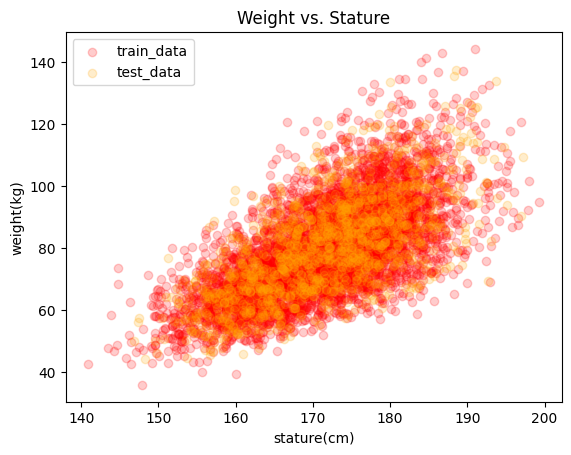

In [162]:
plt.scatter(X_train[:,0],X_train[:,1],c="red",alpha=0.2,label="train_data")
plt.scatter(X_test[:,0],X_test[:,1],c="orange",alpha=0.2,label="test_data")
plt.title("Weight vs. Stature")
plt.xlabel("stature(cm)")
plt.ylabel("weight(kg)")
plt.legend()
plt.show()

5- Implement and fit your object oriented KNN algorithm on the train dataset.

In [163]:
from ansur_knn import KNN

In [174]:
knn=KNN(k=5)
knn.fit(X_train,Y_train)

In [175]:
new_input1=np.array([165,45])
new_input2=np.array([180,90])
new_input3=np.array([175,75])

new_inputs=[new_input1,new_input2,new_input3]

outputs=knn.predict(new_inputs)

for output in outputs:
    if output==0:
        print("woman")
    elif output==1:
        print("man")

woman
man
man


6- Evaluate your KNN algorithm on the test dataset with different values of k = 3, 5, 7, ... and write accuracy results as a table in readme.md.

In [176]:
knn.evaluate(X_test,Y_test)

0.8278418451400329

7- Calculate confusion matrix for test dataset.

In [177]:
Y_pred=knn.predict(X_test)

In [178]:
confusion_matrix= np.zeros((2,2))

for i in range(len(X_test)):
    if Y_test[i] == 0 and Y_pred[i]==0:
        confusion_matrix[0][0] += 1
    elif Y_test[i] == 0 and Y_pred[i]==1:
        confusion_matrix[0][1] += 1
    elif Y_test[i] == 1 and Y_pred[i]==0:
        confusion_matrix[1][0] += 1
    elif Y_test[i] == 1 and Y_pred[i]==1:
        confusion_matrix[1][1] += 1

confusion_matrix

array([[285., 119.],
       [ 90., 720.]])

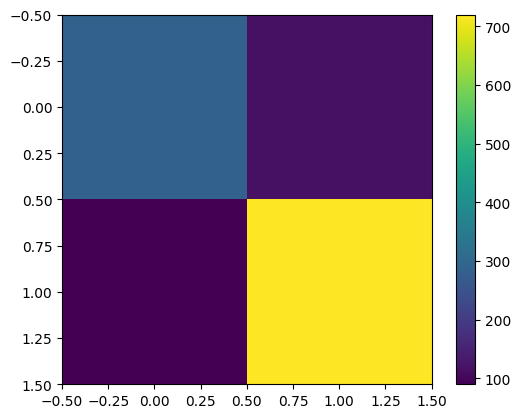

In [179]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

8- Fit the scikit-learn KNN algorithm on the train dataset

In [180]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
knn.predict(new_inputs)

array([0, 1, 1], dtype=int64)

9- Evaluate the scikit-learn KNN algorithm on the test dataset. Make sure your accuracy is equal to scikit-learn's accuracy.

In [181]:
knn.score(X_test,Y_test)

0.8270181219110379

10- Calculate confusion matrix using scikit-learn:

In [182]:
Y_pred_scikit=knn.predict(X_test)

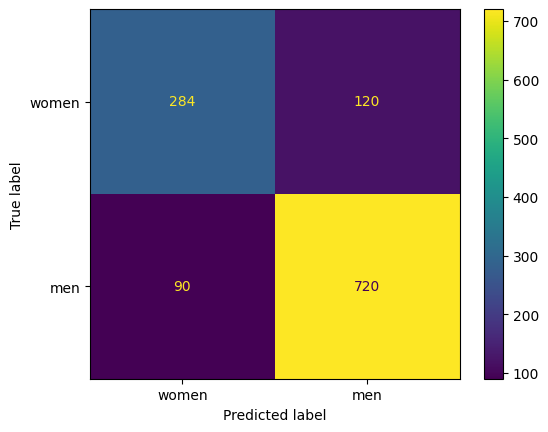

In [183]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred_scikit)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["women", "men"])

cm_display.plot()
plt.show() 